# Financial Expenditures Visualization - test of geocoding scheme

*This acts as a test of the geocoding scheme and visualizing the data of different geocoded levels, it is not a final representation of the dataset*

Utilizing V2 of the GeoAid Database provided by William and Mary, gather key insights about a country of interest. 

Note: the countries available within the snapshot are not all inclusive. Developed countries are less likely to have available information (see GeoAid documentation for more information). 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import shapely

import os

import geopandas as gpd
from geojson import Feature, FeatureCollection

pd.set_option('display.max_columns', None)

In [2]:
ex = pd.read_csv("../../data_final/AidData_v2.0.csv", index_col=0)
ex['country_id'] = [str(x).split('.')[0] for x in ex['country_id']]

### Adding in the Country geodata

To process geocoding scheme... the country geometry must be:  

1) transformed into shapes      
2) merged with dataset of interest on column 'country_id'       
3) transformed to GeoDataFrame to visualize      

In [3]:
# add in localities to the spreadsheet 
countries = pd.read_csv("../../data_final/countries.csv", dtype={'country_id':str})

# convert geometries to shapes 
countries['geometry'] = [shapely.wkt.loads(x) for x in countries['geometry']]

Text(0.5, 1.0, 'BRI Expenditures from 2000-2020, aggregated by country')

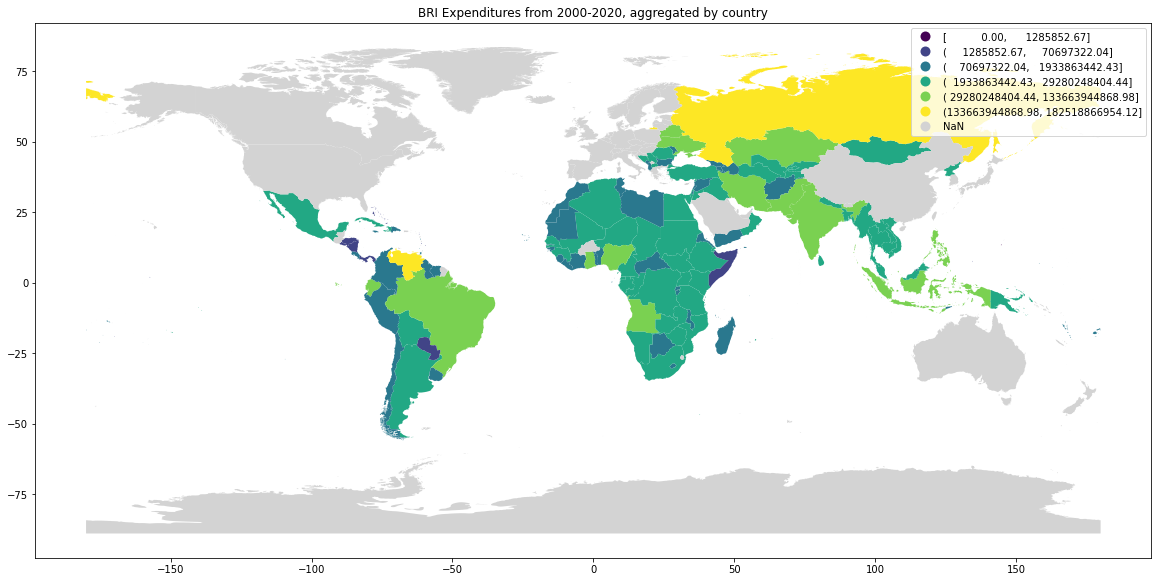

In [4]:
# visualizing aggregates at the country level 
agg = ex.groupby('country_id')['Amount (Constant USD2017)'].sum().reset_index()

# merging in shape geometries
viz1 = countries.merge(agg, on='country_id', how='left')

# make geodataframe 
viz1 = gpd.GeoDataFrame(viz1)

#Plot the Choropleth map
viz1.plot(column = 'Amount (Constant USD2017)', #Assign numerical data column
            legend = True,
            scheme='percentiles',
            figsize = [20,14], 
            missing_kwds={"color": "lightgrey"})

plt.title("BRI Expenditures from 2000-2020, aggregated by country")

### Adding in the city level geodata

To process geocoding scheme... the city geometry must be:  
   
1) merged with dataset of interest on columns {cities: ['country_id', 'id'], expenditures: ['country_id', 'gl3_id']      
2) transformed to GeoDataFrame to visualize, in this step specify the geometry by merging together the latitude and longitude coordinates to a point.   

In [5]:
# add in localities to the spreadsheet 
cities = pd.read_csv("../../data_final/cities.csv", dtype={'country_id':str})

Text(0.5, 1.0, 'BRI Expenditures from 2000-2020')

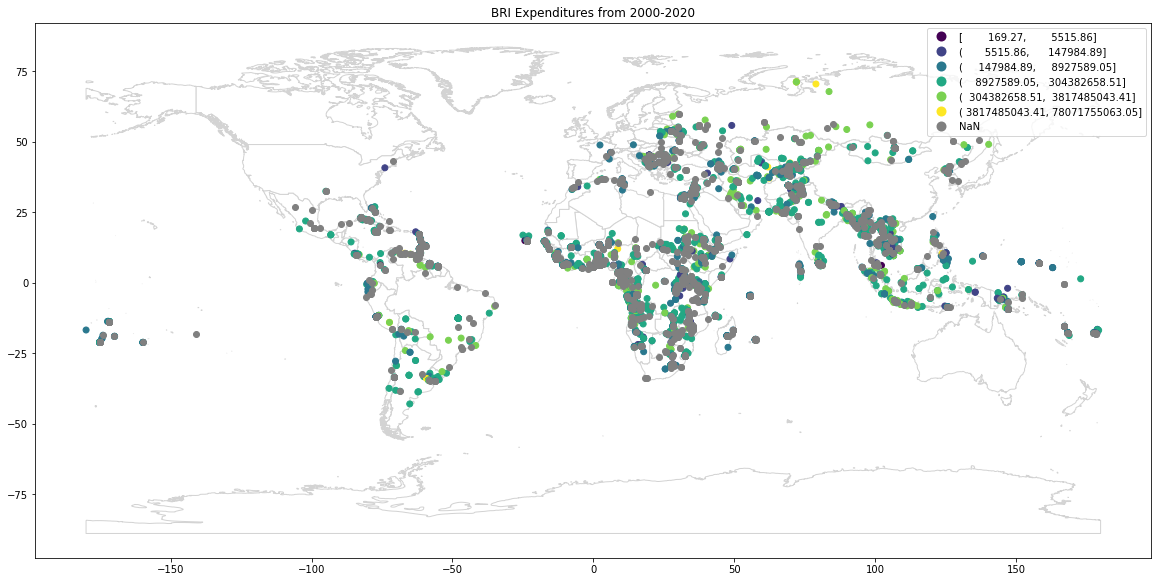

In [6]:
# merging in shape geometries
viz2 = cities.merge(ex, left_on=['country_id', 'id'], right_on=['country_id', 'gl3_id'], how='right')

# make geodataframe 
viz2 = gpd.GeoDataFrame(viz2, geometry=gpd.points_from_xy(viz2['longitude'], viz2['latitude']))

#Plot the Choropleth map

base = gpd.GeoDataFrame(countries).plot(color='white', edgecolor='lightgrey', figsize = [20,14])
viz2.plot(column = 'Amount (Constant USD2017)', #Assign numerical data column
            legend = True,
            scheme='percentiles',
            figsize = [20,14], 
            missing_kwds={"color": "grey"},
            ax=base)

plt.title("BRI Expenditures from 2000-2020")

### Adding in the regional level geodata

1) transformed into shapes  
2) merged with dataset of interest on columns {cities: ['country_id', 'id'], expenditures: ['country_id', 'gl2_id']      
3) transformed to GeoDataFrame to visualize, in this step specify the geometry by merging together the latitude and longitude coordinates to a point.  

In [7]:
# add in localities to the spreadsheet 
regions = pd.read_csv("../../data_final/regions.csv", dtype={'country_id':str})

# convert geometries to shapes 
regions['geometry'] = [shapely.wkt.loads(x) for x in regions['geometry']]

/Users/natalie_kraft/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:373: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Text(0.5, 1.0, 'BRI Expenditures from 2000-2020, aggregated by regions')

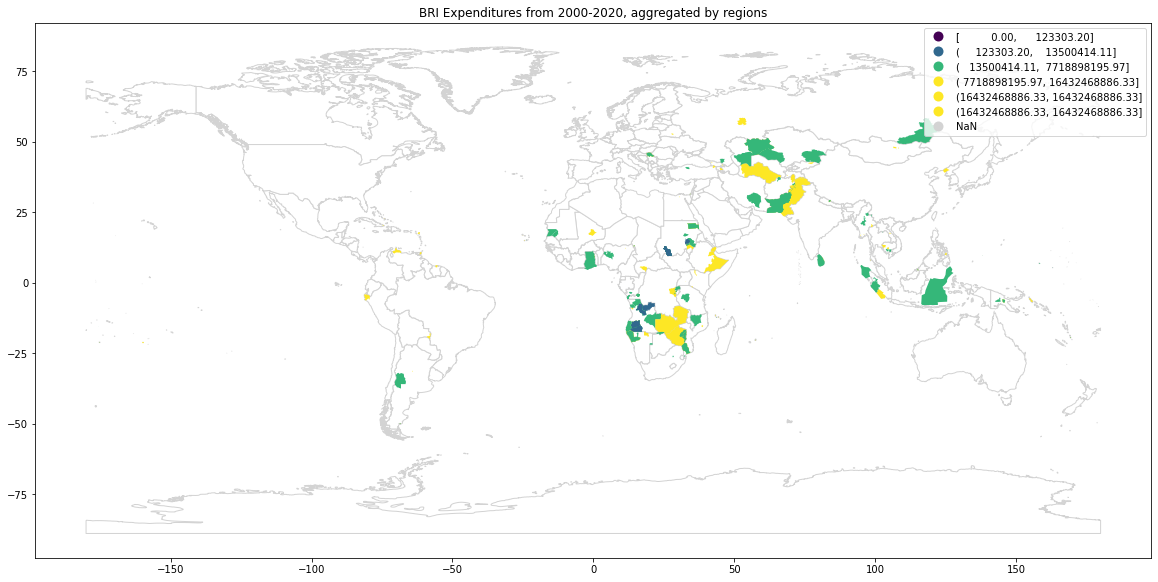

In [8]:
# visualizing aggregates at the country level 
agg = ex.groupby('gl2_id')['Amount (Constant USD2017)'].sum().reset_index()

# merging in shape geometries
viz3 = regions.merge(agg, left_on='id', right_on='gl2_id', how='left')

# make geodataframe 
viz3 = gpd.GeoDataFrame(viz3)

#Plot the Choropleth map
base = gpd.GeoDataFrame(countries).plot(color='white', edgecolor='lightgrey', figsize = [20,14])
viz3.plot(column = 'Amount (Constant USD2017)', #Assign numerical data column
            legend = True,
            scheme='percentiles',
            figsize = [20,14], 
            missing_kwds={"color": "lightgrey"}, 
            ax=base)

plt.title("BRI Expenditures from 2000-2020, aggregated by regions")

Package Versioning for Brian

In [23]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

pandas==1.3.5
matplotlib==3.2.2
geopandas==0.8.2
geojson==2.5.0


In [24]:
!python --version

Python 3.8.3
